In [32]:
# 导入所需的工具包
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 导入设置图片大小的工具
from IPython.core.pylabtools import figsize

plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'

In [2]:
#导入用于可视化的Seaborn
import seaborn as sns
sns.set(font='SimHei')        # 解决Seaborn中文显示问题

# 数据清洗

In [23]:
#在excel中处理
data=pd.read_csv("./data/data.csv")
data.head()

,title,episodes,mark,score,is_finish,follows,coins,likes,danmus,views,...,职场,萌系,萝莉,运动,音乐,魔法,year,month,day,season
0,路人超能100 III(灵能百分百 第三季),6.0,独家,9.9,0,4994916,201746,431421,112107,28308891,...,0,0,0,0,0,0,2022,10,5,4
1,路人超能100 III(灵能百分百 第三季),6.0,独家,9.9,0,4994916,201746,431421,112107,28308891,...,0,0,0,0,0,0,2022,10,5,4
2,海绵宝宝 中文配音,161.0,免费,9.9,1,1360931,455782,1880822,965406,243619346,...,0,0,0,0,0,0,1999,7,17,3
3,海绵宝宝 中文配音,161.0,免费,9.9,1,1360931,455782,1880822,965406,243619346,...,0,0,0,0,0,0,1999,7,17,3
4,银魂,201.0,会员专享,9.9,1,2939641,1265690,3030624,1997635,282916518,...,0,0,0,0,0,0,2006,4,6,2


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2683 entries, 0 to 2682
Data columns (total 68 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       2683 non-null   object 
 1   episodes    2682 non-null   float64
 2   mark        2683 non-null   object 
 3   score       2683 non-null   float64
 4   is_finish   2683 non-null   int64  
 5   follows     2683 non-null   int64  
 6   coins       2683 non-null   int64  
 7   likes       2683 non-null   int64  
 8   danmus      2683 non-null   int64  
 9   views       2683 non-null   int64  
 10  area        2683 non-null   object 
 11  count       2683 non-null   int64  
 12  season_id   2683 non-null   int64  
 13  long_com    2683 non-null   int64  
 14  short_com   2683 non-null   int64  
 15  production  2683 non-null   object 
 16  乙女          2683 non-null   int64  
 17  偶像          2683 non-null   int64  
 18  催泪          2683 non-null   int64  
 19  冒险          2683 non-null  

# 数据转换

In [32]:
#风格标签
import re
regStr = ".*?([\u4E00-\u9FA5]+).*?"  #取中文字符的正则化表达
temp_list = [re.findall(regStr, i) for i in data["tags"]]
# 获取分类(去重)
tag_list = np.unique([i for j in temp_list for i in j]) 
# 增加空白列，用来计数(实际上也是one-hot编码)
tag_df = pd.DataFrame(np.zeros([data.shape[0],tag_list.shape[0]]),columns=tag_list)
for i in range(2704):
    #temp_list[i] ['漫画改', '搞笑', '冒险', '历史']  
    #用ix实现复杂切片，类似定位
    for j in range(len(temp_list[i])):
        tag_df[temp_list[i][j]][i]=1 
    
#print(tag_df.sum().sort_values())
tag_df.head()

,乙女,偶像,催泪,冒险,剧情,动作,动画,励志,历史,原创,...,神魔,科幻,穿越,美食,职场,萌系,萝莉,运动,音乐,魔法
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
tag_df.to_csv("data/bilibili_tag.csv",encoding='utf_8_sig',index=0)

In [35]:
#查看所有类别
tag_df.columns

Index(['乙女', '偶像', '催泪', '冒险', '剧情', '动作', '动画', '励志', '历史', '原创', '喜剧', '声控',
       '奇幻', '小说改', '少儿', '少女', '恋爱', '恐怖', '惊悚', '战斗', '推理', '搞笑', '无', '日常',
       '时泪', '智斗', '机战', '架空', '校园', '歌舞', '治愈', '泡面', '游戏改', '漫画改', '热血',
       '爱情', '特摄', '社团', '神魔', '科幻', '穿越', '美食', '职场', '萌系', '萝莉', '运动', '音乐',
       '魔法'],
      dtype='object')

In [38]:
data=pd.concat([data,tag_df],axis=1)
data.drop('tags',axis=1,inplace=True)
data.head()

,title,episodes,mark,score,is_finish,series_follow,follows,coins,likes,danmus,...,神魔,科幻,穿越,美食,职场,萌系,萝莉,运动,音乐,魔法
0,路人超能100 III(灵能百分百 第三季),6.0,独家,9.9,0,5139314,4994916,201746,431421,112107,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,海绵宝宝 中文配音,161.0,免费,9.9,1,1831107,1360931,455782,1880822,965406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,银魂,201.0,会员专享,9.9,1,3044054,2939641,1265690,3030624,1997635,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,猫和老鼠 旧版,55.0,免费,9.9,1,3191965,2937757,625932,1262188,2266595,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,你的名字。,1.0,免费,9.9,1,4321282,3157205,1185644,1002611,2238026,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
#分级
data['mark'].value_counts()

免费      1474
会员专享     593
独家       542
出品        52
限时免费      25
会员抢先      13
会员特价       5
Name: mark, dtype: int64

In [18]:
data['mark'].replace({"免费":0,"独家":1,"会员专享":1,"出品":1,"限时免费":1,"会员抢先":1,"会员特价":1},inplace=True)

In [40]:
#日期处理
data['pub_date'].describe()

count           2704
unique          1646
top       2015-04-04
freq               9
Name: pub_date, dtype: object

In [43]:
data["date"]=pd.to_datetime(data["pub_date"])

In [47]:
data["year"]=data["date"].dt.year
data["month"]=data["date"].dt.month
data["day"]=data["date"].dt.day

In [51]:
def trans(x):
    if x<4:
        season=1
    elif x<7:
        season=2
    elif x<10:
        season=3
    else:
        season=4
    return season
data["season"]=data["month"].apply(lambda x: trans(x))

In [55]:
data.drop('pub_date',axis=1,inplace=True)
data.drop('series_follow',axis=1,inplace=True)
data.drop('intro',axis=1,inplace=True)
data.drop('date',axis=1,inplace=True)

In [56]:
data.columns

Index(['title', 'episodes', 'mark', 'score', 'is_finish', 'follows', 'coins',
       'likes', 'danmus', 'views', 'area', 'count', 'season_type', 'long_com',
       'short_com', 'production', 'cv', '乙女', '偶像', '催泪', '冒险', '剧情', '动作',
       '动画', '励志', '历史', '原创', '喜剧', '声控', '奇幻', '小说改', '少儿', '少女', '恋爱', '恐怖',
       '惊悚', '战斗', '推理', '搞笑', '无', '日常', '时泪', '智斗', '机战', '架空', '校园', '歌舞',
       '治愈', '泡面', '游戏改', '漫画改', '热血', '爱情', '特摄', '社团', '神魔', '科幻', '穿越',
       '美食', '职场', '萌系', '萝莉', '运动', '音乐', '魔法', 'year', 'month', 'day',
       'season'],
      dtype='object')

In [105]:
text="泽村荣纯：游戏改,"
mc=re.compile(u"(：|:)(.*)(,)",re.DOTALL)
t=mc.search(text).group(2)
print(t)

游戏改


In [6]:
data.to_csv("data/data_processed.csv",encoding='utf_8_sig',index=0)

## 异常值处理 

In [2]:
data=pd.read_csv("data/data.csv")

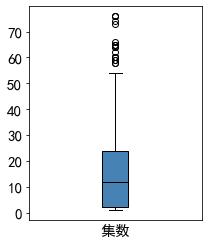

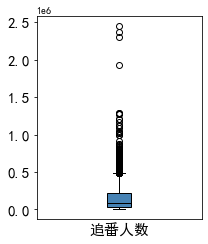

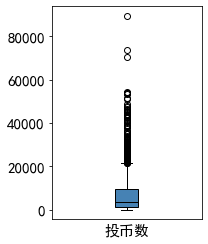

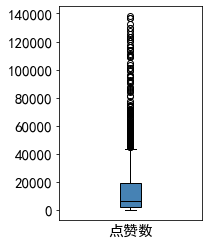

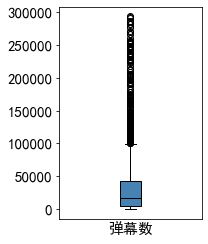

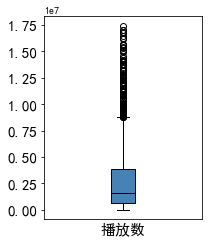

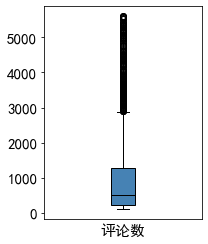

In [5]:
out_list=['episodes','follows','coins','likes','danmus','views','count']
label_list=['集数','追番人数','投币数','点赞数','弹幕数','播放数','评论数']

for i in range(7):
    # data[out_list[i]].plot(kind='box',color='c',showmeans=True,flierprops={'markerfacecolor':'red'})
    plt.figure(figsize=(3,3.5))
    plt.boxplot(data[out_list[i]],boxprops = {'color':'black','facecolor':'steelblue'},medianprops = {'color':'black'},patch_artist=True)
    plt.yticks(size = 15)
    plt.xticks([])
    plt.xlabel(label_list[i],size = 15)
    plt.tight_layout()
    plt.savefig('data/{}-cleaned.png'.format(out_list[i]), dpi=300)

In [4]:
out_list=['episodes','follows','coins','likes','danmus','views','count']
for item in out_list:
    First_Quartile=data[item].describe()['25%']
    Third_Quartile=data[item].describe()['75%']
    IR=Third_Quartile-First_Quartile
# 去除异常值
    data = data[(data[item] > (First_Quartile - 3 * IR)) &
                (data[item] < (Third_Quartile+ 3 * IR))]

In [97]:
data.to_csv("data/data_v1.csv",encoding='utf_8_sig',index=0)

# 探索性分析-离散型变量 mark,is_finish,area,tags,season,month,year

In [3]:
data=pd.read_csv("data/data_v1.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1932 entries, 0 to 1931
Data columns (total 71 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1932 non-null   object 
 1   episodes        1932 non-null   int64  
 2   mark            1932 non-null   object 
 3   score           1932 non-null   float64
 4   is_finish       1932 non-null   int64  
 5   follows         1932 non-null   float64
 6   Follows         1932 non-null   int64  
 7   coins           1932 non-null   int64  
 8   likes           1932 non-null   int64  
 9   danmus          1932 non-null   int64  
 10  views(million)  1932 non-null   float64
 11  views           1932 non-null   int64  
 12  area            1932 non-null   object 
 13  count           1932 non-null   int64  
 14  season_id       1932 non-null   int64  
 15  long_com        1932 non-null   int64  
 16  short_com       1932 non-null   int64  
 17  production      1932 non-null   o

In [360]:
data["follows"].describe()

count    2.683000e+03
mean     7.115562e+05
std      1.351904e+06
min      1.062000e+03
25%      5.396350e+04
50%      1.870410e+05
75%      6.899740e+05
max      1.397271e+07
Name: follows, dtype: float64

In [7]:
counts=data["score"].value_counts()

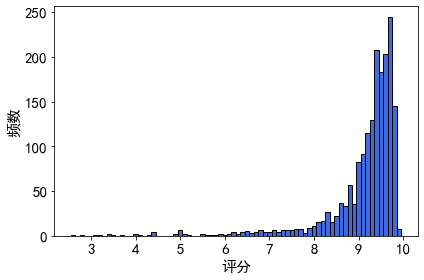

In [8]:
#评分分布
X=list(counts.index)
Y=list(counts.values)

plt.grid(False)
plt.bar(X,Y,color="royalblue",width=0.1,edgecolor="black")
ax = plt.gca()
ax.set_facecolor('white')
plt.ylabel('频数',size = 15)
plt.xlabel('评分',size = 15)
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.tight_layout()
plt.savefig('data/评分分布.png', dpi=300)

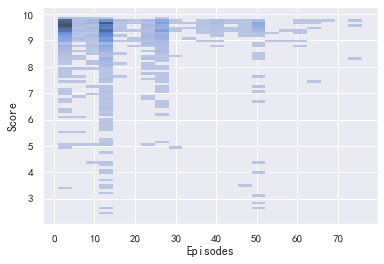

In [154]:
#集数与评分
sns.histplot(x = "episodes", y = "score",data=data)
plt.ylabel('Score')
plt.xlabel('Episodes')
plt.savefig('data/集数与评分.png', dpi=300)

In [205]:
#分级与评分
data["mark"].value_counts()

免费      1240
会员专享     363
独家       272
出品        29
限时免费      22
会员抢先       6
Name: mark, dtype: int64

In [88]:
mean=data.groupby(['mark'])['score'].mean()

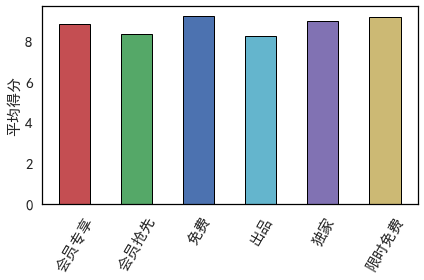

In [91]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
X=list(mean.index)
Y=list(mean.values)
plt.bar(X,Y,color=['r','g','b', 'c', 'm', 'y'],width=0.5,edgecolor="black")
plt.ylabel('平均得分',size = 15)
plt.xticks(rotation=60,size = 15)  # x轴标签倾斜60度
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.tight_layout()
plt.savefig('data/细化分级与评分.png', dpi=300)

In [4]:
data['mark'].replace({"免费":0,"独家":1,"会员专享":2,"出品":3,"限时免费":4,"会员抢先":5,"会员特价":6},inplace=True)

In [192]:
medians = data.groupby(['mark'])['score'].median()

In [193]:
mean=data.groupby(['mark'])['score'].mean()

In [164]:
medians

mark
0    9.40
1    9.35
Name: score, dtype: float64

In [198]:
mean

mark
0    9.238548
1    8.893642
Name: score, dtype: float64

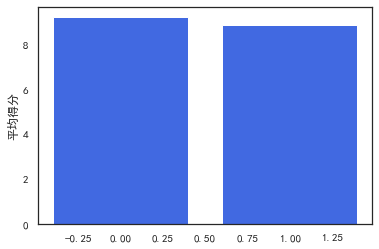

In [201]:
X=list(mean.index)
Y=list(mean.values)
plt.bar([0,1],Y,color="royalblue")

plt.ylabel('平均得分')
plt.savefig('data/分级与评分.png', dpi=300)

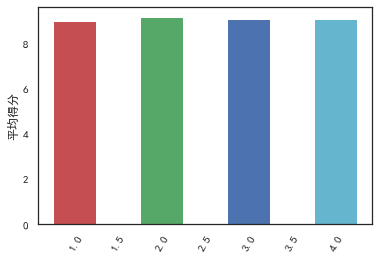

In [210]:
mean=data.groupby(['season'])['score'].mean()
X=list(mean.index)
Y=list(mean.values)
plt.bar(X,Y,width=0.5,color=['r','g','b', 'c', 'm', 'y'])
plt.ylabel('平均得分')
plt.xticks(rotation=60)  # x轴标签倾斜60度
plt.savefig('data/季度与评分hist.png', dpi=300)

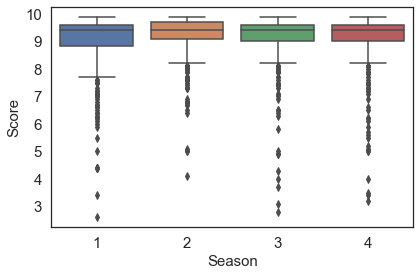

In [14]:
#季度与评分
sns.set_style("white")
sns.boxplot( x='season', y='score', data=data)

plt.ylabel('Score',size = 15)
plt.xlabel('Season',size = 15)
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.tight_layout()
plt.savefig('data/季度与评分.png', dpi=300)

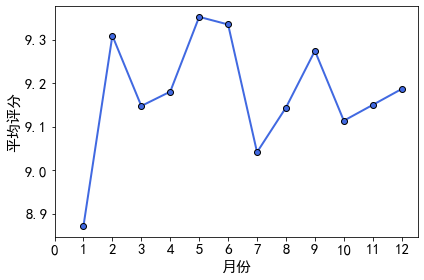

In [9]:
#月度与评分
mean=data.groupby(['month'])['score'].mean()
X=list(mean.index)
Y=list(mean.values)
plt.plot(X,  # x轴
         Y,  # y轴
         linestyle='-',  # 折线类型
         linewidth=2,  # 折线宽度
         color='royalblue',  # 折线颜色
         marker='o',  # 点的形状
         markersize=6,  # 点的大小
         markeredgecolor='black',  # 点的边框色
         markerfacecolor='royalblue',  # 点的填充色
         )
plt.xticks(range(0,len(X)+1,1))
plt.ylabel('平均评分',size = 15)
plt.xlabel('月份',size = 15)
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.tight_layout()
plt.savefig('data/月度与评分line.png', dpi=300)

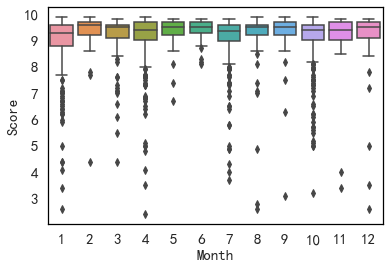

In [94]:
sns.boxplot( x='month', y='score', data=data)
plt.ylabel('Score',size = 15)
plt.xlabel('Month',size = 15)
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.savefig('data/月度与评分.png', dpi=300)

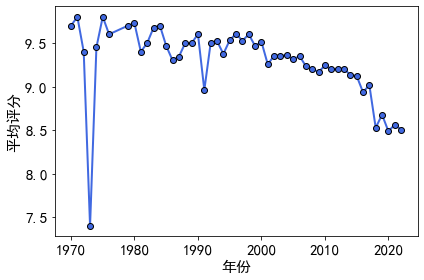

In [10]:
#年份与评分
mean=data.groupby(['year'])['score'].mean()
X=list(mean.index)
Y=list(mean.values)
plt.plot(X,  # x轴
         Y,  # y轴
         linestyle='-',  # 折线类型
         linewidth=2,  # 折线宽度
         color='royalblue',  # 折线颜色
         marker='o',  # 点的形状
         markersize=6,  # 点的大小
         markeredgecolor='black',  # 点的边框色
         markerfacecolor='royalblue',  # 点的填充色
         )
# plt.xticks(range(0,len(X)+1,1))
plt.ylabel('平均评分',size = 15)
plt.xlabel('年份',size = 15)
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.tight_layout()
plt.savefig('data/年份与评分line.png', dpi=300)

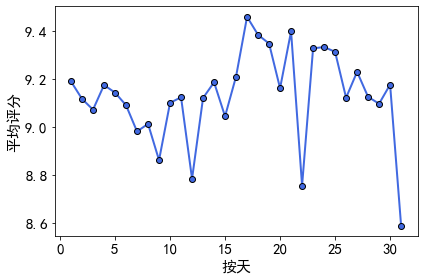

In [11]:
#天与评分
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
mean=data.groupby(['day'])['score'].mean()
X=list(mean.index)
Y=list(mean.values)
plt.plot(X,  # x轴
         Y,  # y轴
         linestyle='-',  # 折线类型
         linewidth=2,  # 折线宽度
         color='royalblue',  # 折线颜色
         marker='o',  # 点的形状
         markersize=6,  # 点的大小
         markeredgecolor='black',  # 点的边框色
         markerfacecolor='royalblue',  # 点的填充色
         )
# plt.xticks(range(0,len(X)+1,1))
plt.ylabel('平均评分',size = 15)
plt.xlabel('按天',size = 15)
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.tight_layout()
plt.savefig('data/天与评分line.png', dpi=300)

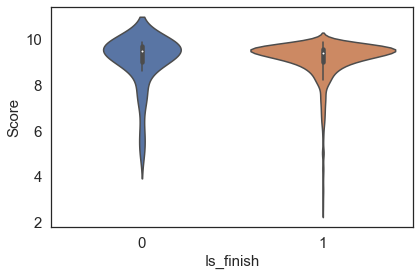

In [15]:
#是否完结与评分
sns.set_style("white")
sns.violinplot( x='is_finish', y='score', data=data)
plt.ylabel('Score',size = 15)
plt.xlabel('Is_finish',size = 15)
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.tight_layout()
plt.savefig('data/完结与评分.png', dpi=300)

In [224]:
data.groupby(['is_finish'])['score'].mean()

is_finish
0    9.050000
1    9.116525
Name: score, dtype: float64

In [240]:
data["area"].value_counts()

0       1846
美国        60
英国        14
芬兰         4
加拿大        3
韩国         2
法国         2
中国大陆       1
Name: area, dtype: int64

In [5]:
#地区与评分
data['area'].replace({"日本":0,"美国":1,"英国":1,"芬兰":1,"加拿大":1,"韩国":1,"法国":1,"中国大陆":1},inplace=True)

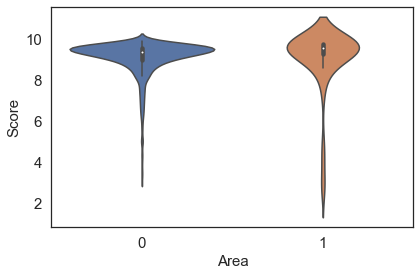

In [17]:
sns.set_style("white")
sns.violinplot( x='area', y='score', data=data)
plt.ylabel('Score',size = 15)
plt.xlabel('Area',size = 15)
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.tight_layout()
plt.savefig('data/地区与评分.png', dpi=300)

In [244]:
data.groupby(['area'])['score'].mean()

area
0    9.117443
1    9.062791
Name: score, dtype: float64

Text(0.5, 0, 'Follows')

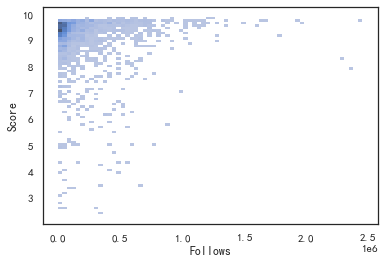

In [225]:
sns.histplot(x = "follows", y = "score",data=data)
plt.ylabel('Score')
plt.xlabel('Follows')
# plt.savefig('data/集数与评分.png', dpi=300)

In [271]:
data["production"].value_counts()

无                 1094
Production I.G      41
Sunrise             39
Studio DEEN         38
J.C.STAFF           36
                  ... 
 DLE                 1
小岛哲                  1
Fanworks             1
Studio Puyukai       1
Kigumi               1
Name: production, Length: 175, dtype: int64

In [115]:
#标签
tags=data.columns[18:66]

In [116]:
tag_df=data[tags]

In [118]:
count=tag_df.sum().sort_values(ascending = False)[:10]

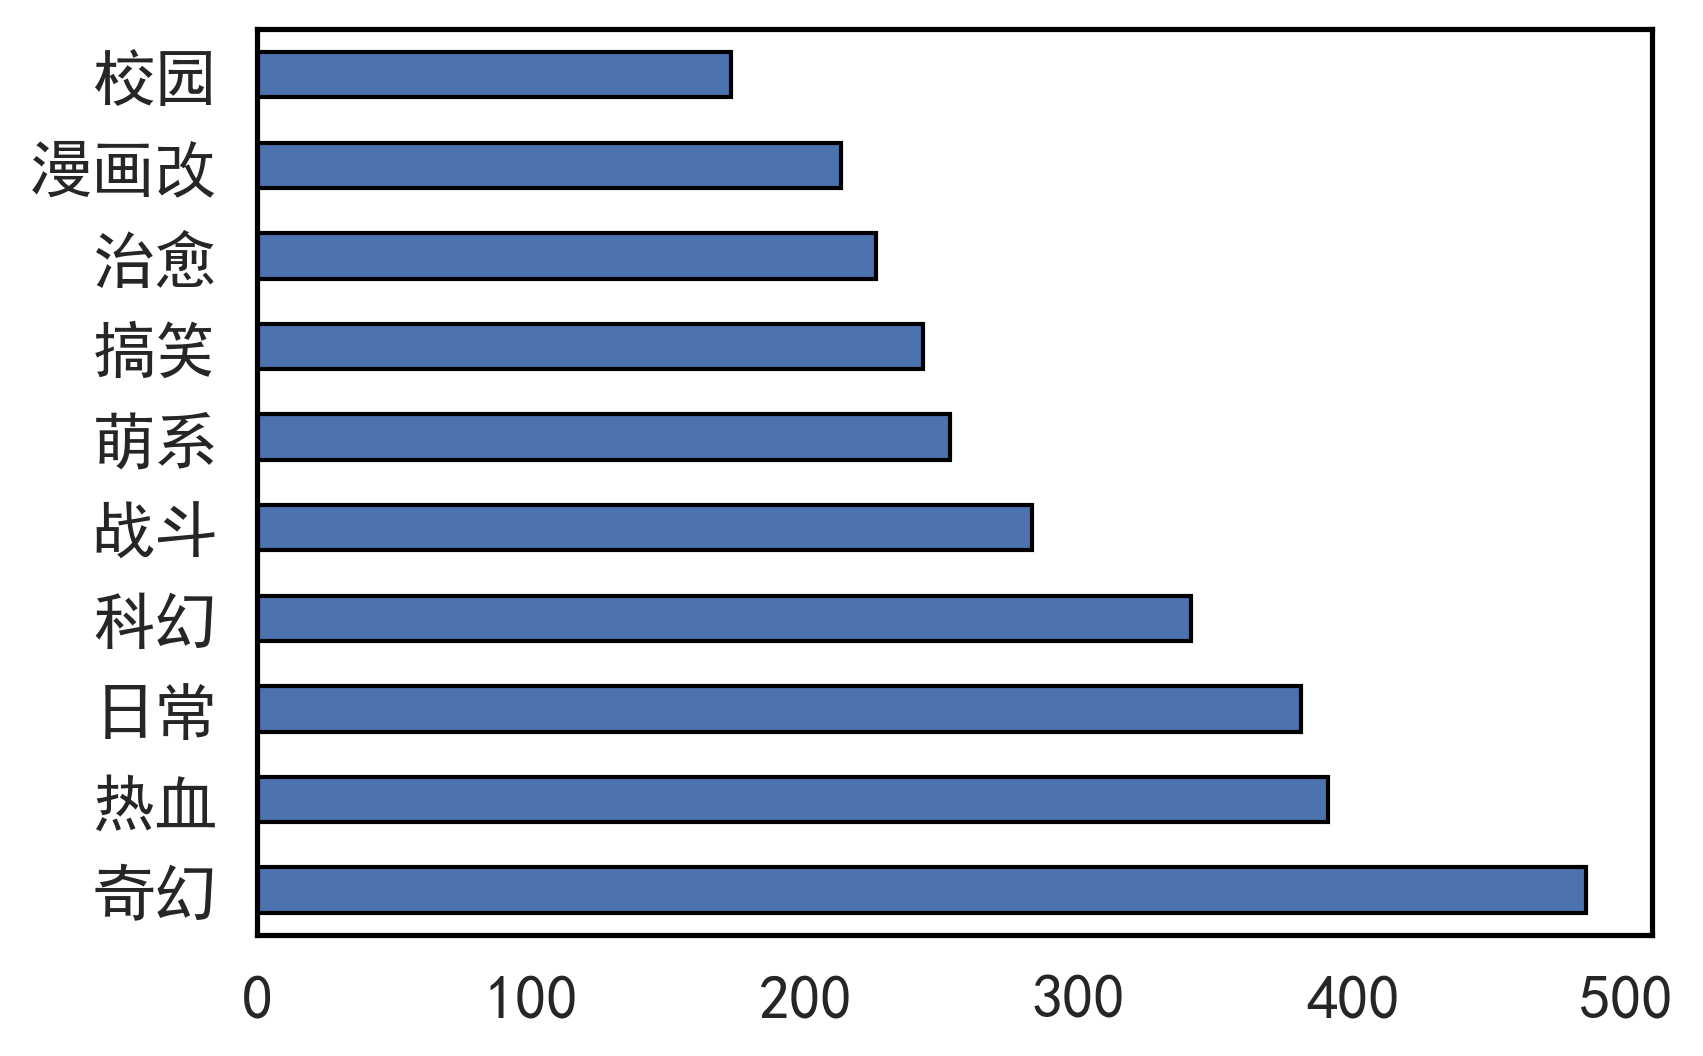

In [122]:
#coding:utf-8
# figsize=(12,8)
plt.figure(dpi=300)

count.plot(x = 'index',y = 'count', kind = 'barh', edgecolor = 'black')
# 绘图格式
plt.ylabel('')
plt.yticks(size = 15)
plt.xticks(size = 15)
# plt.title('TOP10 热门标签', size = 25);
plt.savefig('data/TOP10 热门标签.png', dpi=300)

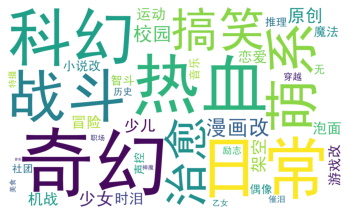

In [222]:
from wordcloud import WordCloud
figsize=(12,8)
tag_sum=tag_df.sum().sort_values()
wc = WordCloud(
        font_path=r"C:\users\Feng\Downloads\simhei.ttf",
        max_words=100,
        width=2000,
        height=1200,
        background_color='white'
        )
word_cloud = wc.generate_from_frequencies(tag_sum)
# 写词云图片
word_cloud.to_file("wordcloud.jpg")
# 显示词云文件
plt.imshow(word_cloud)
plt.axis("off")
plt.savefig('data/热门标签.png', dpi=300)

In [233]:
count.index

Index(['奇幻', '热血', '日常', '科幻', '战斗', '萌系', '搞笑', '治愈', '漫画改', '校园'], dtype='object')

In [263]:
tag=['奇幻', '热血', '日常', '科幻', '战斗', '萌系', '搞笑', '治愈', '漫画改', '校园',"其他"]

In [259]:
data["score"].describe().values

array([1.93200000e+03, 9.11501035e+00, 9.71511526e-01, 2.40000000e+00,
       9.00000000e+00, 9.40000000e+00, 9.60000000e+00, 9.90000000e+00])

In [266]:
value=[]
for item in tag:
    count=data[data[item]==1]
    value.append(count["score"].describe().values)
tagdf=pd.DataFrame(value,columns=data["score"].describe().index)

In [269]:
tagdf.to_csv("data/tag_count.csv")

# 探索性分析 -连续性变量 follows,coins,likes,danmus,views,count,long_com,short_com,score,episodes

In [7]:
cv=['episodes','follows','coins','likes','danmus','views','count','long_com','short_com','score']

In [8]:
features=data[cv]
corr_list=abs(features.corr()['score']).sort_values(ascending=False)
corr_list

score        1.000000
coins        0.157796
long_com     0.092166
danmus       0.059038
episodes     0.026031
likes        0.019082
short_com    0.018094
views        0.018012
follows      0.011808
count        0.005215
Name: score, dtype: float64

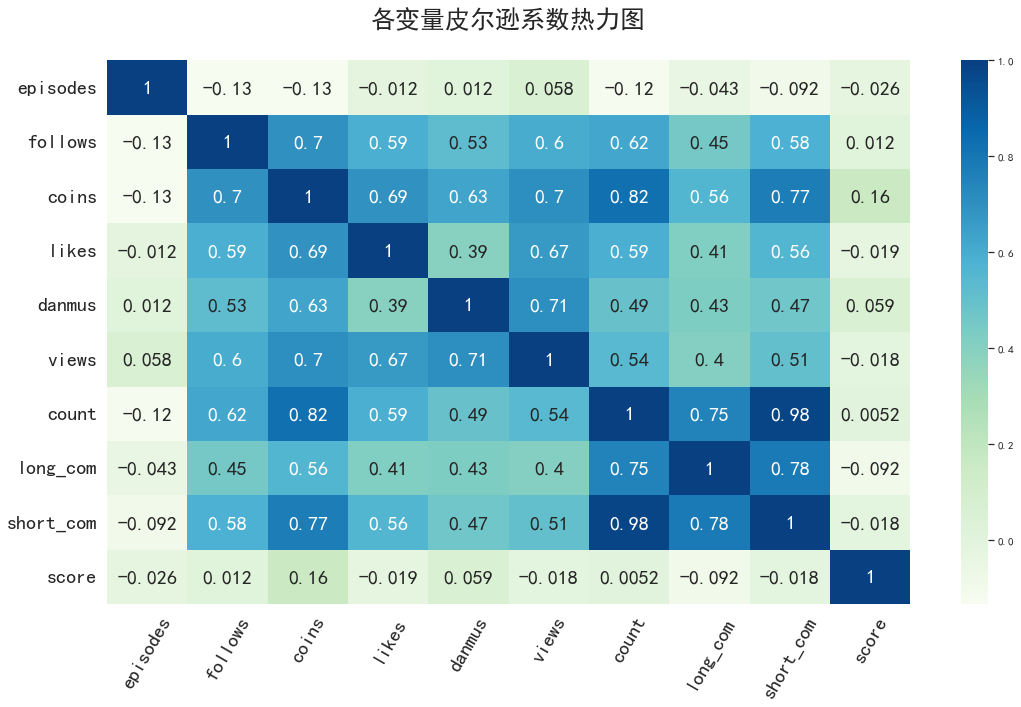

In [9]:
plt.rc('figure',figsize=(18,10))
plt.title('各变量皮尔逊系数热力图',y=1.05,size=25)
# corr_list=features.drop('score',axis=1)
sns.heatmap(features.corr('pearson'), annot_kws={"fontsize":20},annot=True,cmap='GnBu',vmax=1.0)
plt.xticks(rotation=60) 
plt.xticks(fontsize=20)
plt.yticks(rotation=360)
plt.yticks(fontsize=20)
plt.savefig('data/相关系数.png', dpi=300)

# 特征选择

## 特征重要性（随机森林） 

In [15]:
features=['mark', 'score', 'is_finish', 'area', '乙女', '偶像', '催泪',
       '冒险', '剧情', '动作', '动画', '励志', '历史', '原创', '喜剧', '声控', '奇幻', '小说改', '少儿',
       '少女', '恋爱', '恐怖', '惊悚', '战斗', '推理', '搞笑', '无', '日常', '时泪', '智斗', '机战',
       '架空', '校园', '歌舞', '治愈', '泡面', '游戏改', '漫画改', '热血', '爱情', '特摄', '社团',
       '神魔', '科幻', '穿越', '美食', '职场', '萌系', '萝莉', '运动', '音乐', '魔法', 'year',
       'month', 'day', 'season', '其他']
features=data[features]

In [16]:
from sklearn.ensemble import RandomForestRegressor

X = features.drop('score', axis=1)
Y = features['score']

clf = RandomForestRegressor()
clf.fit(X,Y)

importance = clf.feature_importances_
feature_results = pd.DataFrame({'feature': list(X.columns), 
                                'importance': clf.feature_importances_})
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)
feature_results.head(10)

,feature,importance
0,year,0.194730
1,day,0.158291
2,month,0.085037
3,战斗,0.051912
4,mark,0.044091
5,season,0.030541
6,原创,0.026180
7,奇幻,0.024905
8,科幻,0.020380
9,少儿,0.019845


## 去除高共线特征

In [394]:
#coins&comments,
#danmus&views
#coins&views
#comments&follows
features.drop('comments',axis=1,inplace=True)
features.drop('views',axis=1,inplace=True)

In [395]:
feature=['coins','follows','danmus','series_follow','score','mark','likes']   

In [26]:
a=pd.read_csv(r"E:\数据分析方法\18124399冯秦萱\bilibili_process.csv")
features=a.drop(['title','episodes','is_finish','link','comments','views','season_id','media_id','intro','pub_date'],axis=1)
features.to_csv(r"E:\数据分析方法\18124399冯秦萱\bilibili_feature.csv",encoding='utf_8_sig',index=0)
features.head()

,mark,score,series_follow,follows,coins,likes,danmus,乙女,偶像,催泪,...,神魔,科幻,穿越,美食,职场,萌系,萝莉,运动,音乐,魔法
0,1,9.8,42054,42054,3699,14313,4359,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,9.8,1329569,32219,24186,6789,42722,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,9.8,648310,439718,29411,33390,107632,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,9.8,574715,101403,10643,6649,65613,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,9.8,646174,460507,13587,10091,23523,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# 模型构建

In [334]:
data.columns

Index(['title', 'episodes', 'mark', 'score', 'is_finish', 'follows', 'coins',
       'likes', 'danmus', 'views(million)', 'views', 'area', 'count',
       'season_id', 'long_com', 'short_com', 'production', '乙女', '偶像', '催泪',
       '冒险', '剧情', '动作', '动画', '励志', '历史', '原创', '喜剧', '声控', '奇幻', '小说改', '少儿',
       '少女', '恋爱', '恐怖', '惊悚', '战斗', '推理', '搞笑', '无', '日常', '时泪', '智斗', '机战',
       '架空', '校园', '歌舞', '治愈', '泡面', '游戏改', '漫画改', '热血', '爱情', '特摄', '社团',
       '神魔', '科幻', '穿越', '美食', '职场', '萌系', '萝莉', '运动', '音乐', '魔法', 'year',
       'month', 'day', 'season', '其他'],
      dtype='object')

In [73]:
from sklearn.linear_model import Lasso
# features=['episodes', 'mark', 'score', 'is_finish', 'follows', 'coins',
#        'likes', 'danmus', 'views(million)', 'views', 'area', 'count', 'long_com', 'short_com', '乙女', '偶像', '催泪',
#        '冒险', '剧情', '动作', '动画', '励志', '历史', '原创', '喜剧', '声控', '奇幻', '小说改', '少儿',
#        '少女', '恋爱', '恐怖', '惊悚', '战斗', '推理', '搞笑', '无', '日常', '时泪', '智斗', '机战',
#        '架空', '校园', '歌舞', '治愈', '泡面', '游戏改', '漫画改', '热血', '爱情', '特摄', '社团',
#        '神魔', '科幻', '穿越', '美食', '职场', '萌系', '萝莉', '运动', '音乐', '魔法', 'year',
#        'month', 'day', 'season', '其他']
features=['mark', 'score', 'is_finish', 'area', '乙女', '偶像', '催泪',
       '冒险', '剧情', '动作', '动画', '励志', '历史', '原创', '喜剧', '声控', '奇幻', '小说改', '少儿',
       '少女', '恋爱', '恐怖', '惊悚', '战斗', '推理', '搞笑', '无', '日常', '时泪', '智斗', '机战',
       '架空', '校园', '歌舞', '治愈', '泡面', '游戏改', '漫画改', '热血', '爱情', '特摄', '社团',
       '神魔', '科幻', '穿越', '美食', '职场', '萌系', '萝莉', '运动', '音乐', '魔法', 'year',
       'month', 'day', 'season', '其他']
features=data[features]
feature = features.drop(columns = 'score')
targets = pd.DataFrame(features['score'])
lasso = Lasso(alpha=0.05) 
lasso.fit(feature,targets)

print('相关系数为：',np.round(lasso.coef_,5))  #输出结果，保留五位小数

## 计算相关系数非零的个数
print('相关系数非零个数为：',np.sum(lasso.coef_ != 0))
mask = lasso.coef_ != 0  #返回一个相关系数是否为零的布尔数组


相关系数为： [-0.0648  -0.      -0.      -0.       0.       0.      -0.       0.
  0.       0.       0.      -0.      -0.       0.      -0.      -0.
  0.      -0.       0.      -0.       0.       0.      -0.03139 -0.
  0.      -0.       0.       0.       0.      -0.      -0.       0.
  0.       0.       0.      -0.       0.      -0.       0.      -0.
  0.       0.      -0.       0.      -0.       0.       0.       0.
  0.       0.       0.      -0.02539  0.00222  0.00489  0.      -0.     ]
相关系数非零个数为： 5


In [22]:
features.to_csv("features.csv")

In [74]:
feature.iloc[:,mask]

,mark,战斗,year,month,day
0,1,0,2022,10,4
1,1,0,2022,10,4
2,1,0,2022,9,30
3,1,0,2022,9,30
4,1,0,2021,8,25
...,...,...,...,...,...
1927,0,0,2018,8,5
1928,2,0,2018,1,1
1929,2,0,2020,12,27
1930,2,0,2018,8,10


In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [8]:
features=['coins','danmus','year','score','战斗','long_com','month']
features=data[features]

In [9]:
feature = features.drop(columns = 'score')
targets = pd.DataFrame(features['score'])

# 按照 7：3 的比例划分训练集和测试集(用train_test_split方法)
X, X_test, y, y_test = train_test_split(feature, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(1352, 6)
(580, 6)
(1352, 1)
(580, 1)


In [10]:
#将所有特征缩放到0-1之间（用MinMaxScaler方法）
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [11]:
# 将训练集和测试集的标签转换为一维数组
y = np.array(y).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

In [24]:
from sklearn.metrics import r2_score
def mae (y_true,y_pred):
    return np.mean(abs(y_true - y_pred))
def rmse (y_true,y_pred):
    return np.sqrt(np.mean(np.square(y_true - y_pred)))
def mape (y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred) / y_true)) * 100

# 接受模型，训练模型，并在测试集上评估模型
def fit_and_evaluate(model,X,y):
    
    # 做出预测和评估
    model_pred = model.predict(X)
    model_mae = mae(y,model_pred)
    model_rmse = rmse(y,model_pred)
    model_mape = mape(y,model_pred)
    model_r2 = r2_score(y,model_pred)

    # 返回性能指标
    return model_mae,model_rmse,model_mape,model_r2

In [25]:
lr = LinearRegression()
lr.fit(X,y)
lmodel_mae,lmodel_rmse,lmodel_mape,lmodel_r2 = fit_and_evaluate(lr,X,y)
lmae,lrmse,lmape,lr2=fit_and_evaluate(lr,X_test,y_test)
print('Linear Regression Performance on the train set: MAE = {},RMSE={},MAPE={},R2={}'.format(lmodel_mae,lmodel_rmse,lmodel_mape,lmodel_r2))
print('Linear Regression Performance on the test set: MAE = {},RMSE={},MAPE={},R2={}'.format(lmae,lrmse,lmape,lr2))

Linear Regression Performance on the train set: MAE = 0.5422674399073965,RMSE=0.8616400608867971,MAPE=7.384144986077963,R2=0.17258493617323034
Linear Regression Performance on the test set: MAE = 0.5580134607951216,RMSE=0.9310781220882813,MAPE=7.9242731118859595,R2=0.17420356251679447


In [26]:
svm = SVR(C=1000,gamma =0.1)
svm.fit(X,y)
smodel_mae,smodel_rmse,smodel_mape,smodel_r2 = fit_and_evaluate(svm,X,y)
smae,srmse,smape,sr2=fit_and_evaluate(svm,X_test,y_test)
print('Support Vector Machine Regression Performance on the train set:MAE = {},RMSE={},MAPE={},R2={}'.format(smodel_mae,smodel_rmse,smodel_mape,smodel_r2))
print('Support Vector Machine Regression Performance on the test set: MAE = {},RMSE={},MAPE={},R2={}'.format(smae,srmse,smape,sr2))

Support Vector Machine Regression Performance on the train set:MAE = 0.4458122389401701,RMSE=0.8647834314966854,MAPE=6.547554637948348,R2=0.16653689717070308
Support Vector Machine Regression Performance on the test set: MAE = 0.48285922036120005,RMSE=0.9518253658775152,MAPE=7.342326688997737,R2=0.13699102966196264


In [27]:
random_forest = RandomForestRegressor(random_state = 60,min_samples_leaf=2, n_estimators=193)
random_forest.fit(X,y)
rmodel_mae,rmodel_rmse,rmodel_mape,rmodel_r2 = fit_and_evaluate(random_forest,X,y)
rmae,rrmse,rmape,rr2=fit_and_evaluate(random_forest,X_test,y_test)
print('Random Forest Regression Performance on the train set: MAE = {},RMSE={},MAPE={},R2={}'.format(rmodel_mae,rmodel_rmse,rmodel_mape,rmodel_r2))
print('Random Forest Regression Performance on the test set: MAE = {},RMSE={},MAPE={},R2={}'.format(rmae,rrmse,rmape,rr2))

Random Forest Regression Performance on the train set: MAE = 0.23751168614610244,RMSE=0.40648461602746616,MAPE=3.199867740959634,R2=0.8158550194066394
Random Forest Regression Performance on the test set: MAE = 0.5042013889521035,RMSE=0.8835647834460111,MAPE=7.122398233490242,R2=0.2563346331987494


In [28]:
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted.fit(X,y)
gmodel_mae,gmodel_rmse,gmodel_mape,gmodel_r2 = fit_and_evaluate(gradient_boosted,X,y)
gmae,grmse,gmape,gr2=fit_and_evaluate(gradient_boosted,X_test,y_test)
print('Gradient Boosted Regression Performance on the train set: MAE = {},RMSE={},MAPE={},R2={}'.format(gmodel_mae,gmodel_rmse,gmodel_mape,gmodel_r2))
print('Linear Regression Performance on the test set: MAE = {},RMSE={},MAPE={},R2={}'.format(gmae,grmse,gmape,gr2))

Gradient Boosted Regression Performance on the train set: MAE = 0.3698514129920022,RMSE=0.5515826430761471,MAPE=4.6512690725885895,R2=0.6609272871531999
Linear Regression Performance on the test set: MAE = 0.5133808544248415,RMSE=0.906040047540417,MAPE=7.2453617413899485,R2=0.21802017328403478


In [433]:
knn = KNeighborsRegressor(n_neighbors=10)
model_mae,model_rmse,model_mape,model_r2 = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set:MAE = {},RMSE={},MAPE={},R2={}'.format(model_mae,model_rmse,model_mape,model_r2))

K-Nearest Neighbors Regression Performance on the test set:MAE = 0.5261034482758622,RMSE=0.9267695097152965,MAPE=7.58895122835334,R2=0.1818287105338302


In [434]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
model_mae,model_rmse,model_mape,model_r2 = fit_and_evaluate(ada)
print('AdaBoost Performance on the test set: MAE = {},RMSE={},MAPE={},R2={}'.format(model_mae,model_rmse,model_mape,model_r2))

AdaBoost Performance on the test set: MAE = 1.2133538488930493,RMSE=1.3386608622195786,MAPE=14.166342722847622,R2=-0.7070329086936542


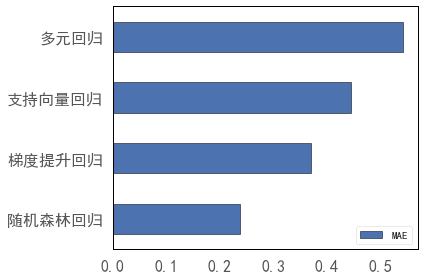

In [60]:

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model':['多元回归',
                                          '支持向量回归',
                                          '梯度提升回归',
                                          '随机森林回归',
                                          ],
                                'MAE':[lmodel_mae,
                                       smodel_mae,
                                       gmodel_mae, 
                                       rmodel_mae, 
                                       ]})
figsize=(4,7)
# 测试集上 mae的水平条形图
model_comparison.sort_values('MAE',ascending = True).plot(x = 'model',
                                                           y = 'MAE',
                                                           kind = 'barh',
                                                           color = 'b', 
                                                           edgecolor = 'black')
# 绘图格式
plt.ylabel('')
plt.yticks(size = 16)
plt.xticks(size = 16)
plt.tight_layout()
plt.savefig('data/MAE.png', dpi=300)

# 模型优化

In [454]:
#网格搜索

# 梯度增强过程中使用的树的数量
param={'n_estimators':[i for i in range(10,200)],'min_samples_leaf':[i for i in range(1,10)]}

# 对GradientBoostingRegressor模型进行参数网格搜索（基于随机搜索中得到的max_depth和loss）
model = RandomForestRegressor(random_state = 60)

grid_search = GridSearchCV(estimator = model, param_grid=param, cv = 5, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, 
                           return_train_score = True)

grid_search.fit(X, y)

Fitting 5 folds for each of 1710 candidates, totalling 8550 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=60), n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [10, 11, 12, 13, 14, 15, 16, 17, 18,
                                          19, 20, 21, 22, 23, 24, 25, 26, 27,
                                          28, 29, 30, 31, 32, 33, 34, 35, 36,
                                          37, 38, 39, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [455]:
grid_search.best_params_

{'min_samples_leaf': 2, 'n_estimators': 193}

In [465]:
grid_search.best_params_

{'min_samples_leaf': 2, 'n_estimators': 193}

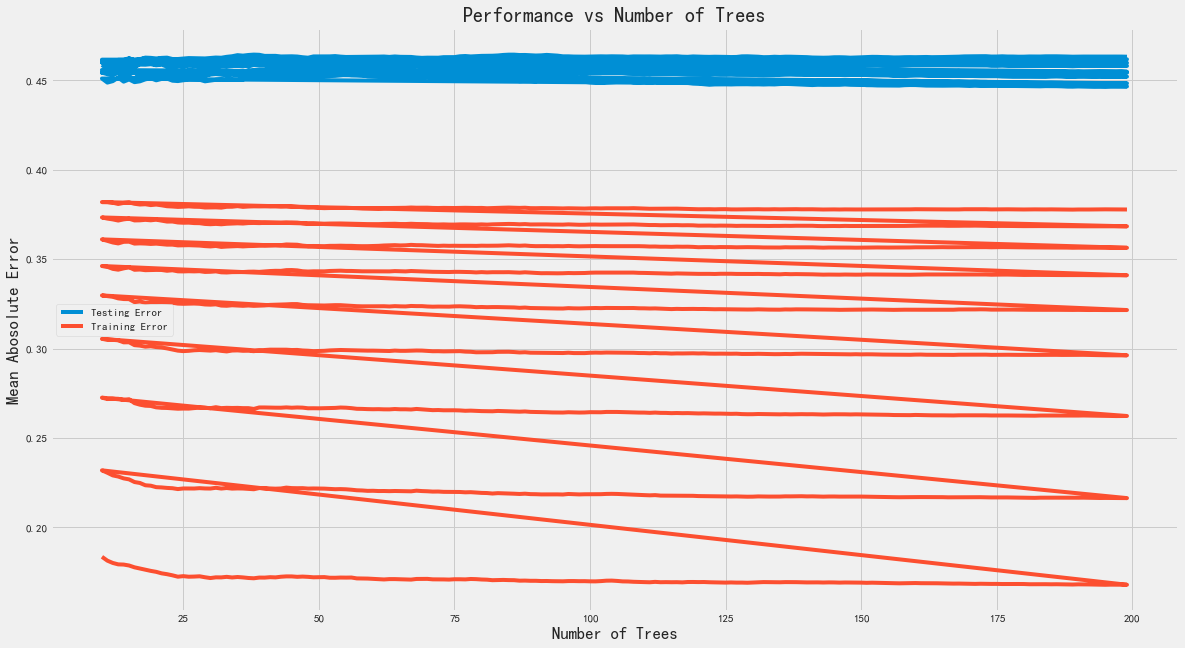

In [456]:
# 将结果导入数据框，绘制结果中param_n_estimators与mean_train_score、mean_test_score的曲线图
figsize=(15, 8)
results = pd.DataFrame(grid_search.cv_results_)
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

# 模型评估

In [457]:
# 构建基本GradientBoostingRegressor模型
base_model = RandomForestRegressor(random_state = 42)

# 获取最优模型
best_model = grid_search.best_estimator_

#显示最优模型参数
best_model

RandomForestRegressor(min_samples_leaf=2, n_estimators=193, random_state=60)

In [458]:
model_mae,model_rmse,model_mape,model_r2 = fit_and_evaluate(best_model)

#基于y_test，用上文中的MAE指标计算模型拟合误差
print('best model performance on the test set:MAE = {},RMSE={},MAPE={},R2={}'.format(model_mae,model_rmse,model_mape,model_r2))

best model performance on the test set:MAE = 0.46789892012232087,RMSE=0.8189507258651745,MAPE=6.5848325334666695,R2=0.36112439478331804


<module 'matplotlib.pyplot' from 'E:\\Anaconda 3\\lib\\site-packages\\matplotlib\\pyplot.py'>

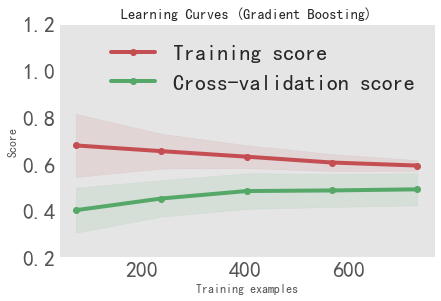

In [695]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
plt.style.use('ggplot') 
figsize=(15, 6) 
 
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.style.use('ggplot') 
    figsize=(15, 6) 
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
 
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
 
    plt.legend(loc="best")
    return plt
 

 
# 图一
title = r"Learning Curves (Gradient Boosting)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = best_model
plot_learning_curve(estimator,title, X, y, ylim=(0.2, 1.2), cv=cv, n_jobs=1)

In [459]:
import sklearn.metrics
def plot_learning_curve(model,X,X_test,y,y_test):
    train_score=[]
    test_score=[]
    for i in range(1,len(X)+1):
        model.fit(X[:i],y[:i])
        y_train_predict=model.predict(X[:i])
        train_score.append(mae(y[:i],y_train_predict))
        y_test_predict=model.predict(X_test)
        test_score.append(mae(y_test,y_test_predict))
    plt.figure(figsize=(8,8),dpi=300)
    plt.plot([i for i in range(1,len(X)+1)],train_score,label="train")
    plt.plot([i for i in range(1,len(X)+1)],test_score,label="test")
    plt.legend()
    plt.show()
    
plot_learning_curve(best_model,X,X_test,y,y_test)

KeyboardInterrupt: 

D:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:993: RuntimeWarning: invalid value encountered in true_divide
  y_hat /= len(self.estimators_)


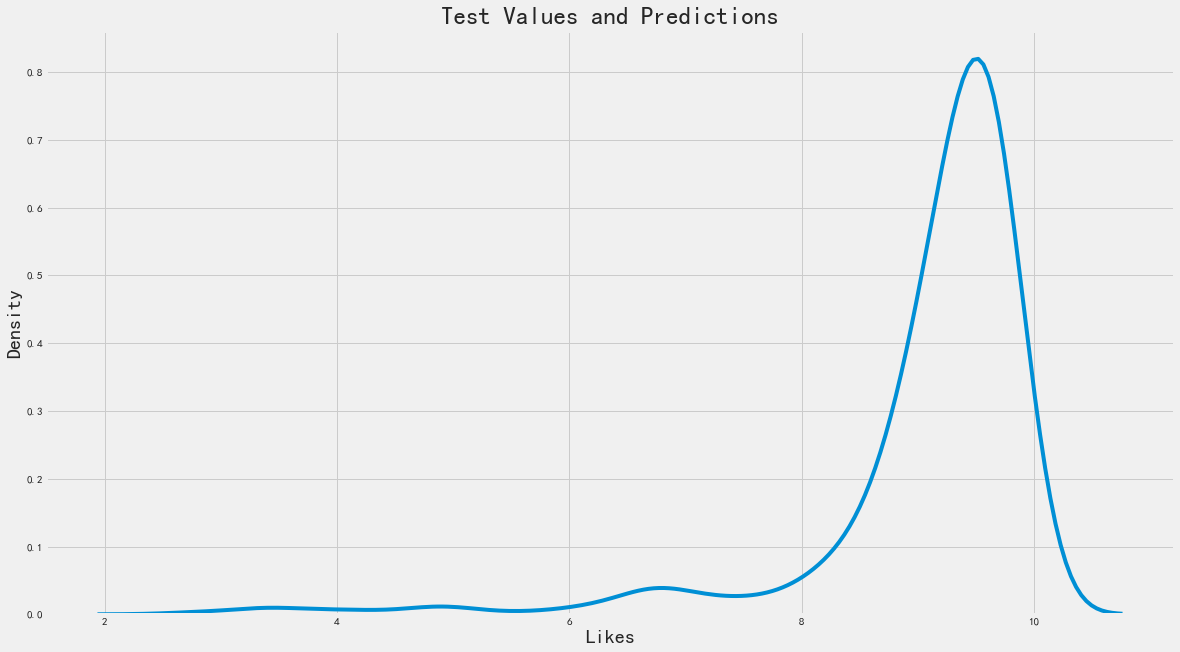

In [462]:
figsize = (6, 6)
# 最终预测的密度图和测试值
best_pred=best_model.predict(X_test)
sns.kdeplot(best_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

plt.xlabel('Likes',size=20)
plt.ylabel('Density',size=20)
plt.title('Test Values and Predictions',size=25);

In [37]:
best_model = RandomForestRegressor(random_state = 60,min_samples_leaf=2, n_estimators=193)
best_model.fit(X,y)

RandomForestRegressor(min_samples_leaf=2, n_estimators=193, random_state=60)

In [39]:
mae,rmse,mape,r2=fit_and_evaluate(best_model,X,y)
print('Random Forest Regression Performance on the train set: MAE = {},RMSE={},MAPE={},R2={}'.format(mae,rmse,mape,r2))

Random Forest Regression Performance on the train set: MAE = 0.23751168614610244,RMSE=0.40648461602746616,MAPE=3.199867740959634,R2=0.8158550194066394


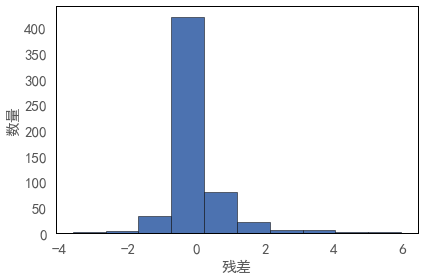

In [47]:
figsize = (6, 6)
# 计算最优模型的拟合残差
best_pred=best_model.predict(X_test)
error = best_pred-y_test

# 绘制残差分布直方图，参数bin=20
plt.hist(error,color="b",edgecolor = 'black')
plt.xlabel('残差',size=15)
plt.ylabel('数量',size=15)
plt.yticks(size=15)
plt.xticks(size=15)
plt.tight_layout()
plt.savefig('data/残差.png', dpi=300)

In [42]:
importances = best_model.feature_importances_
 
feature_list = list(feature.columns)

feature_results = pd.DataFrame({'feature': feature_list, 
                                'importance': importances})

feature_results = feature_results.sort_values('importance', 
                                              ascending = False).reset_index(drop=True)
 
feature_results.head(10)

,feature,importance
0,coins,0.335165
1,long_com,0.205533
2,year,0.179676
3,danmus,0.164500
4,month,0.070162
5,战斗,0.044965


<Figure size 1800x1200 with 0 Axes>

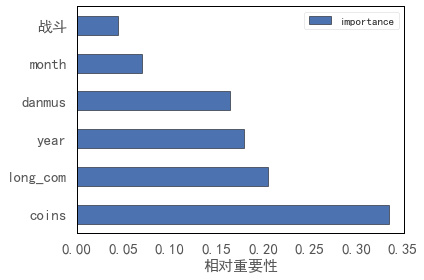

In [56]:
#coding:utf-8
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.figure(dpi=300)
#plt.style.use('seaborn-whitegrid')
figsize=(30,12) 

# 对前十个画水平柱状图
feature_results.loc[:9, :].plot(x = 'feature', y = 'importance', 
                                 edgecolor = 'black',
                                 kind='barh', color = 'b');
plt.xlabel('相对重要性', size = 15); plt.ylabel('',fontsize=20)
plt.yticks(size=15)
plt.xticks(size=15)
plt.tight_layout()
plt.savefig('data/重要性.png', dpi=300)

In [650]:
most_important_features = feature_results['feature'][:10]
f_index = [feature_list.index(x) for x in most_important_features]

X_reduced = X[:, f_index]
X_test_reduced = X_test[:, f_index]
print('Most important training features shape: ', X_reduced.shape)
print('Most important testing  features shape: ', X_test_reduced.shape)

Most important training features shape:  (917, 10)
Most important testing  features shape:  (394, 10)


In [653]:
GB=best_model
#验证LinearRegression模型在删减前和删减后数据集上的拟合效果
GB.fit(X, y)
GB_full_pred = GB.predict(X_test)

GB.fit(X_reduced, y)
GB_reduced_pred = GB.predict(X_test_reduced)

# Display results
print('完整数据集: MAE = %0.4f.' % mae(y_test, GB_full_pred))
print('删减数据集: MAE = %0.4f.' % mae(y_test, GB_reduced_pred))

完整数据集: MAE = 1826.7525.
删减数据集: MAE = 1818.7363.
